In [2]:
import numpy as np
import math

import matplotlib.pyplot as plt

from itertools import cycle
import operator
from IPython.display import display, clear_output

from sympy import *
init_printing()

In [3]:
def acel(v, r):
    return ts*r / (m*(r**2) + I) - ts * v / (wf * (m*(r**2) + I))

def evaluateRatio(targetDist, r):
    t_acum = 0
    x_acum = 0
    v_acum = 0
    dt= 0.0001

    while x_acum < targetDist:
        a = acel(v_acum, r)
        
        if a < 0:
            print(a)
            print('Error: not enough torque at: a=' + str(ratio) + ", v=" + str(v_acum))
            return 0 
        
        v_acum += a * dt
        x_acum += v_acum * dt
        
        t_acum += dt
        
        if t_acum > 10:
            #print('Error: took more than 10 seconds')
            return 0
    return v_acum

In [11]:
ts = 2.291
m = 0.25
I = 0.00002 * 2
wf = 50000 * math.pi/30

In [18]:
Power = 3300
Kv = 1000
Voltage = 24.6

ts = 120*Power / (math.pi * Kv * Voltage)
wf = Kv*Voltage * math.pi / 30


print('Torque: %.2f' %ts)
print('Free Speed: %.2f' %wf)
print('Torque*Speed: %.2f' %(ts*wf))

Torque: 5.35
Free Speed: 1494.14
Torque*Speed: 8000.00


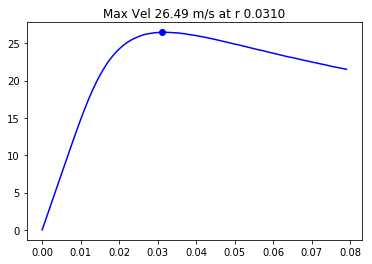

In [19]:
minR = 0
maxR = 0.08
targetDist = [1] # meters


colors = cycle(["black", "blue", "grey", "silver", "lime", "green", "olive"])
#fig = plt.figure()
#ax = fig.add_subplot(111)

rs = []
vels = []

for dist in targetDist:
    rs = np.arange(minR, maxR, 0.001)

    vels = [evaluateRatio(dist, x) for x in rs]

    index, maxVel = max(enumerate(vels), key=operator.itemgetter(1))

    maxRVal = rs[index]
    print('%.2f m: Max Vel %.2f m/s at r %.4f' %(dist, maxVel, maxRVal))

clear_output()

plt.plot(rs, vels, color='blue')
plt.plot(maxRVal, maxVel, '-o', color='blue')
plt.title('Max Vel %.2f m/s at r %.4f' %(maxVel, maxRVal))
plt.show()


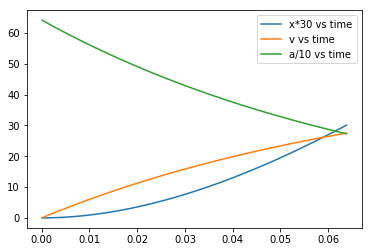

In [7]:
times = []
xs = []
vs = []
acels = []

t_acum = 0
x_acum = 0
v_acum = 0
dt= 0.0001

while x_acum < 1:
    a = acel(v_acum, maxRVal)
            
    v_acum += a * dt
    x_acum += v_acum * dt
        
    t_acum += dt
    
    times.append(t_acum)
    xs.append(x_acum)
    vs.append(v_acum)
    acels.append(a)
    
    if t_acum > 10:
        print('Error: took more than 10 seconds')
        break

plt.plot(times, [x*30 for x in xs], label='x*30 vs time')
plt.plot(times, vs, label = 'v vs time')
plt.plot(times, [x/10 for x in acels], label='a/10 vs time')
plt.legend(loc='best')
plt.show()

In [35]:
rpm = 5676
radps = rpm * math.pi/30
power = 400

# Final Components
https://hobbyking.com/en_us/propdrive-v2-5050-580kv-brushless-outrunner-motor.html  
https://hobbyking.com/en_us/hobbyking-yep-100a-2-6s-sbec-brushless-speed-controller.html?wrh_pdp=3  
? https://hobbyking.com/en_us/hobbyking-red-brick-200a-esc-1.html (cheaper)


# Elastic Version
https://hobbyking.com/en_us/turnigy-xk2850-3580kv-brushless-inrunner.html  
https://hobbyking.com/en_us/turnigy-battery-3000mah-4s-40c-lipo-pack-xt-60.html  
https://hobbyking.com/en_us/hobbyking-red-brick-200a-esc-1.html  

# Hangers-on

(30.7 - 31.8) https://hobbyking.com/en_us/propdrive-v2-5050-580kv-brushless-outrunner-motor.html
(28.6) https://hobbyking.com/en_us/turnigy-xk-4074-2000kv-brushless-inrunner.html
(28.2) (30$) https://hobbyking.com/en_us/4362-1300kv-1994w-brushless-motor-suitable-for-hydropro-inception.html


CIM:        14.23, 15.75, 18.14  
3000W BLDC: 20.95, 23.82, 28.50  
1800W BLDC: 19.1,  21.65, 25.69  
https://hobbyking.com/en_us/4362-1300kv-1994w-brushless-motor-suitable-for-hydropro-inception.html:  
            20.61, 23.27, 27.52  
https://hobbyking.com/en_us/propdrive-v2-series-4248-650kv-brushless-outrunner-motor.html
            21,    23,    27
https://hobbyking.com/en_us/kd-53-20-brushless-outrunner-195kv.html  
            23,    25,    28
https://hobbyking.com/en_us/kd-53-30-high-voltage-brushless-outrunner-190kv.html
            25,    27.6,  31.7

Ayyyy:      24,    26.6,  30.6 ($30)
https://www.aliexpress.com/item/New-Arrival-Brushless-Outrunner-Motor-N5065-270KV-1665W-For-DIY-Electric-Skate-Board/32841762317.html?spm=2114.search0104.3.23.34933e53SX6i0y&ws_ab_test=searchweb0_0,searchweb201602_7_10065_10130_10068_10890_10547_319_10546_317_10548_10545_10696_453_10084_454_10083_10618_10307_537_536_10902_10059_10884_10887_321_322_10103,searchweb201603_16,ppcSwitch_0&algo_expid=31ec8296-0093-49d8-b2ef-5bf28ef43646-3&algo_pvid=31ec8296-0093-49d8-b2ef-5bf28ef43646&transAbTest=ae803_5 

Ayyy:       19.6m  21.8,   26.3 (20v)
https://www.aliexpress.com/item/Free-shipping-New-Aeolian-4250-C3520-600kv-RC-airplane-motor/32804455670.html?spm=2114.search0104.3.43.34933e53SX6i0y&ws_ab_test=searchweb0_0,searchweb201602_7_10065_10130_10068_10890_10547_319_10546_317_10548_10545_10696_453_10084_454_10083_10618_10307_537_536_10902_10059_10884_10887_321_322_10103,searchweb201603_16,ppcSwitch_0&algo_expid=31ec8296-0093-49d8-b2ef-5bf28ef43646-6&algo_pvid=31ec8296-0093-49d8-b2ef-5bf28ef43646&transAbTest=ae803_5

